<a href="https://colab.research.google.com/github/udayameister/Multimodel_GNN/blob/main/clinical_Preprocess_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd

# Load the main merged dataset
adni_data = pd.read_csv('/content/ADNIMERGE_27Jun2024.csv')

<ipython-input-48-2c2df1f0ee11>:4: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  adni_data = pd.read_csv('/content/ADNIMERGE_27Jun2024.csv')


In [50]:
# Select relevant columns
columns_of_interest = ['AGE', 'PTGENDER', 'PTEDUCAT', 'MMSE', 'CDRSB', 'ADAS11', 'DX']
adni_data = adni_data[columns_of_interest]

In [51]:
# Filter for AD and NC
adni_data = adni_data[adni_data['DX'].isin(['AD', 'CN'])]

In [52]:
from sklearn.preprocessing import LabelEncoder

# Encode the diagnosis column
label_encoder = LabelEncoder()
adni_data['DX'] = label_encoder.fit_transform(adni_data['DX'])

In [53]:
# Encode gender column if present
adni_data['PTGENDER'] = label_encoder.fit_transform(adni_data['PTGENDER'])

In [54]:
# Fill missing values with the mean of *numeric* columns
numeric_adni_data = adni_data.select_dtypes(include=['number'])
adni_data[numeric_adni_data.columns] = numeric_adni_data.fillna(numeric_adni_data.mean())

In [55]:
# Fill missing values with the mean of the column
adni_data.fillna(adni_data.mean(), inplace=True)


In [56]:
# Features and target
X = adni_data.drop('DX', axis=1)
y = adni_data['DX']


In [57]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3216, 6)
(804, 6)
(3216,)
(804,)


In [59]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

        AGE  PTGENDER  PTEDUCAT  MMSE  CDRSB  ADAS11
16099  65.1         0        16  29.0    0.0    3.33
12557  67.6         0        14  30.0    0.0    5.00
14368  71.0         1        12  29.0    0.0    6.67
15840  68.4         0        15  29.0    0.0    3.00
6343   77.0         1        16  30.0    0.0   12.00
        AGE  PTGENDER  PTEDUCAT  MMSE  CDRSB  ADAS11
13713  77.7         0        18  26.0    0.0     3.0
4994   77.1         0        14  27.0    0.0     4.0
12727  66.4         1        20  29.0    0.0     6.0
10183  70.0         0        10  30.0    0.0     2.0
5083   73.3         1        17  30.0    0.0     8.0
16099    0
12557    0
14368    0
15840    0
6343     0
Name: DX, dtype: int64
13713    0
4994     0
12727    0
10183    0
5083     0
Name: DX, dtype: int64


In [60]:
print(X_train.tail())
print(y_train.tail())
print(X_test.tail())
print(y_test.tail())

        AGE  PTGENDER  PTEDUCAT  MMSE  CDRSB  ADAS11
4579   68.4         0        18  30.0    0.0    5.00
5428   73.3         1        20  29.0    0.5    1.33
2534   74.2         0        13  30.0    0.0    5.33
14801  69.0         1        20  26.0    0.0    4.67
14172  81.1         1        18  29.0    0.0    6.33
4579     0
5428     0
2534     0
14801    0
14172    0
Name: DX, dtype: int64
        AGE  PTGENDER  PTEDUCAT  MMSE  CDRSB  ADAS11
10249  88.6         0        20  30.0    0.0    6.00
12267  74.0         1        16  30.0    0.0    8.00
15287  56.5         0        20  30.0    0.0    4.33
16005  71.2         0        18  29.0    0.0    6.00
15866  69.9         1        16  26.0    0.0    4.67
10249    0
12267    0
15287    0
16005    0
15866    0
Name: DX, dtype: int64


In [62]:
print(X_test.head())

        AGE  PTGENDER  PTEDUCAT  MMSE  CDRSB  ADAS11
13713  77.7         0        18  26.0    0.0     3.0
4994   77.1         0        14  27.0    0.0     4.0
12727  66.4         1        20  29.0    0.0     6.0
10183  70.0         0        10  30.0    0.0     2.0
5083   73.3         1        17  30.0    0.0     8.0


In [63]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [65]:
# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [66]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
81/81 [==============================] - 1s 5ms/step - loss: 0.2655 - accuracy: 0.9662 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 2/50
81/81 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 9.6417e-04 - val_accuracy: 1.0000
Epoch 3/50
81/81 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 2.2913e-04 - val_accuracy: 1.0000
Epoch 4/50
81/81 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 8.0165e-05 - val_accuracy: 1.0000
Epoch 5/50
81/81 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.2992e-05 - val_accuracy: 1.0000
Epoch 6/50
81/81 [==============================] - 0s 3ms/step - loss: 9.1277e-04 - accuracy: 1.0000 - val_loss: 1.7290e-05 - val_accuracy: 1.0000
Epoch 7/50
81/81 [==============================] - 0s 3ms/step - loss: 6.4297e-04 - accuracy: 1.0000 - val_loss: 9.9624e-06 - val_accur

In [67]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')


26/26 [==============================] - 0s 2ms/step - loss: 2.9418e-10 - accuracy: 1.0000
Test Accuracy: 1.00


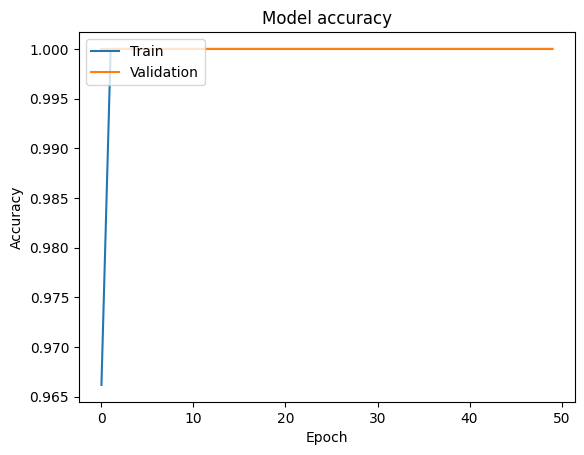

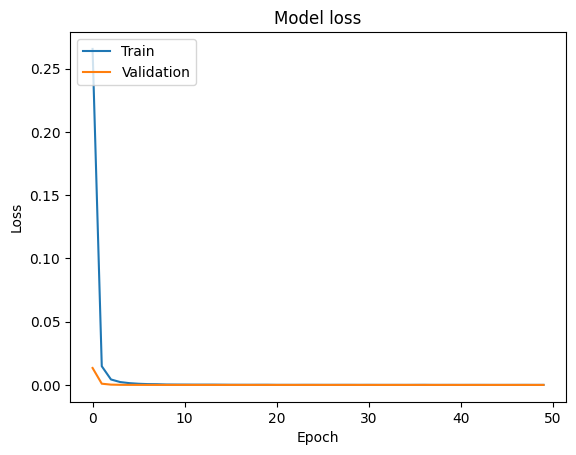

In [68]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
